In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('FIFA2.csv')
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position simplified
0,L. Messi,31,Argentina,94,94,FC Barcelona,133705000,683650,2202,Left,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,274065000,FW
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,93170000,490050,2228,Right,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,153791000,FW
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,143385000,350900,2143,Right,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,276001000,FW
3,De Gea,27,Spain,91,93,Manchester United,87120000,314600,1471,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,167706000,GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,123420000,429550,2281,Right,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,237644000,MD


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18159 entries, 0 to 18158
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18159 non-null  object 
 1   Age                       18159 non-null  int64  
 2   Nationality               18159 non-null  object 
 3   Overall                   18159 non-null  int64  
 4   Potential                 18159 non-null  int64  
 5   Club                      17918 non-null  object 
 6   Value                     18159 non-null  int64  
 7   Wage                      18159 non-null  int64  
 8   Special                   18159 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [5]:
data.shape

(18159, 83)

### 세부 능력치를 Features로, 포지션을 Target으로 여러가지 모델을 돌려보자

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [7]:
def get_pred(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)[:, 1]
    
    return pred, pred_proba

def get_clf_eval(clf, X_train, X_test, y_train, y_test):
    pred, pred_proba = get_pred(clf, X_train, X_test, y_train, y_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    confusion = confusion_matrix(y_test, pred)
    
    print(f'{clf}\n정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f} \n 오차행렬: {confusion}\n')


In [8]:
X = data.iloc[:, 47:81]
y = pd.factorize(data['Position simplified'])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((14527, 34), (3632, 34))

### 분류 모델

In [9]:
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
ada_clf = AdaBoostClassifier()
rf_clf = RandomForestClassifier()

get_clf_eval(lr_clf, X_train, X_test, y_train, y_test)
get_clf_eval(dt_clf, X_train, X_test, y_train, y_test)
get_clf_eval(knn_clf, X_train, X_test, y_train, y_test)
get_clf_eval(ada_clf, X_train, X_test, y_train, y_test)
get_clf_eval(rf_clf, X_train, X_test, y_train, y_test)

LogisticRegression()
정확도: 0.8722, 정밀도: 0.8916, 재현율: 0.8864, F1: 0.8889 
 오차행렬: [[ 557    0  137    6]
 [   2  371    0    0]
 [ 115    0 1165   94]
 [   0    0  110 1075]]

DecisionTreeClassifier()
정확도: 0.8095, 정밀도: 0.8354, 재현율: 0.8360, F1: 0.8356 
 오차행렬: [[ 516    1  174    9]
 [   1  371    1    0]
 [ 195    0 1036  143]
 [   4    0  164 1017]]

KNeighborsClassifier()
정확도: 0.8527, 정밀도: 0.8742, 재현율: 0.8690, F1: 0.8715 
 오차행렬: [[ 534    0  162    4]
 [   1  371    1    0]
 [ 139    0 1130  105]
 [   1    0  122 1062]]

AdaBoostClassifier()
정확도: 0.7382, 정밀도: 0.7741, 재현율: 0.8032, F1: 0.7767 
 오차행렬: [[ 595    2   98    5]
 [   2  371    0    0]
 [ 396    0  682  296]
 [   2    2  148 1033]]

RandomForestClassifier()
정확도: 0.8747, 정밀도: 0.8925, 재현율: 0.8864, F1: 0.8892 
 오차행렬: [[ 543    0  154    3]
 [   2  371    0    0]
 [ 113    0 1160  101]
 [   0    0   82 1103]]



### 부스트 모델

In [10]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [11]:
xgb_clf = XGBClassifier()
lgbm_clf = LGBMClassifier()

get_clf_eval(xgb_clf, X_train, X_test, y_train, y_test)
get_clf_eval(lgbm_clf, X_train, X_test, y_train, y_test)

[11:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
정확도: 0.8722, 정밀도: 0.8904, 재현율: 0.8828, F1: 0.8862 
 오차행렬: [[ 5

### LogisticRegression, RandomForest, xgboost, lightgbm가 높은 성능을 보임 -> 파라미터 튜닝!

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# LR

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 2, 5, 10]
}

lr_clf = LogisticRegression()
grid_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, refit=True)
grid_lr.fit(X_train, y_train)

print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 2, 'penalty': 'l2'}
0.8793971259293146


In [14]:
lr_clf1 = LogisticRegression(C=5, penalty='l2')
lr_clf1.fit(X_train, y_train)
pred_lr = lr_clf1.predict(X_test)

print('로지스틱 회귀 정확도: ', round(accuracy_score(y_test, pred_lr), 4))

로지스틱 회귀 정확도:  0.8725


In [15]:
# RF

params = {
    'n_estimators': [30],
    'max_depth': [8, 12, 15, 20],
    'min_samples_leaf': [4, 6, 8, 12, 18],
    'min_samples_split': [4, 6, 8, 16, 20]
}

rf_clf = RandomForestClassifier()
grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=3, refit=True)
grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 30}
0.8790528160446188


In [16]:
rf_clf1 = RandomForestClassifier(max_depth= 15, min_samples_leaf= 8, 
                                 min_samples_split= 8, n_estimators= 100)
rf_clf1.fit(X_train, y_train)
pred_rf = rf_clf1.predict(X_test)

print('랜덤포레스트 정확도: ', round(accuracy_score(y_test, pred_rf), 4))

랜덤포레스트 정확도:  0.8756


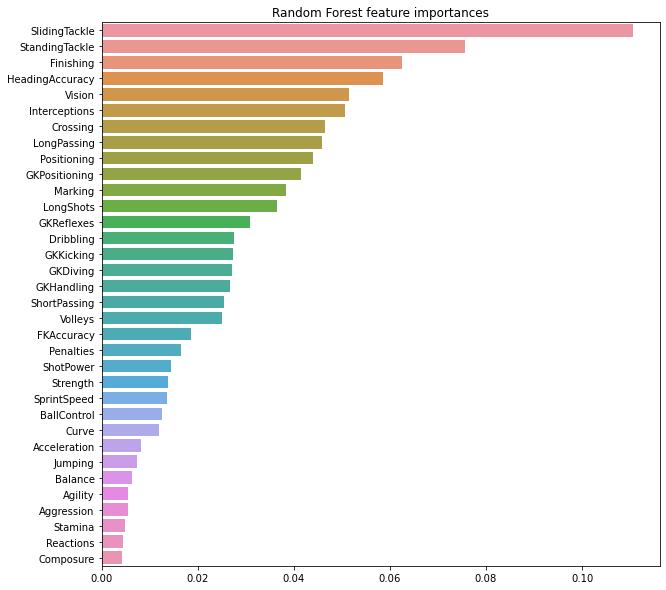

In [17]:
f_imp_rf = rf_clf1.feature_importances_
f_imp_rf = pd.Series(f_imp_rf, index=X_train.columns)
f_imp_rf = f_imp_rf.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.title('Random Forest feature importances')
sns.barplot(x=f_imp_rf, y=f_imp_rf.index)

In [18]:
# xgboost

params = {
    'n_estimators': [30],
    'max_depth': [4, 6, 8, 10, 15],
    'min_samples_leaf': [4, 6, 8, 12, 16],
    'min_samples_split': [4, 6, 8, 12, 16]
}

xgb_clf = XGBClassifier(silent=True)
grid_xgb = GridSearchCV(xgb_clf, param_grid=params, cv=3, refit=True)
grid_xgb.fit(X_train, y_train)

print(grid_xgb.best_params_)
print(grid_xgb.best_score_)

[11:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:30:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:30:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

[11:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

In [19]:
xgb_clf1 = XGBClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
xgb_clf1.fit(X_train, y_train)

pred_xgb = xgb_clf1.predict(X_test)
print('XGB 정확도: ', round(accuracy_score(y_test, pred_xgb), 4))

[11:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB 정확도:  0.8756


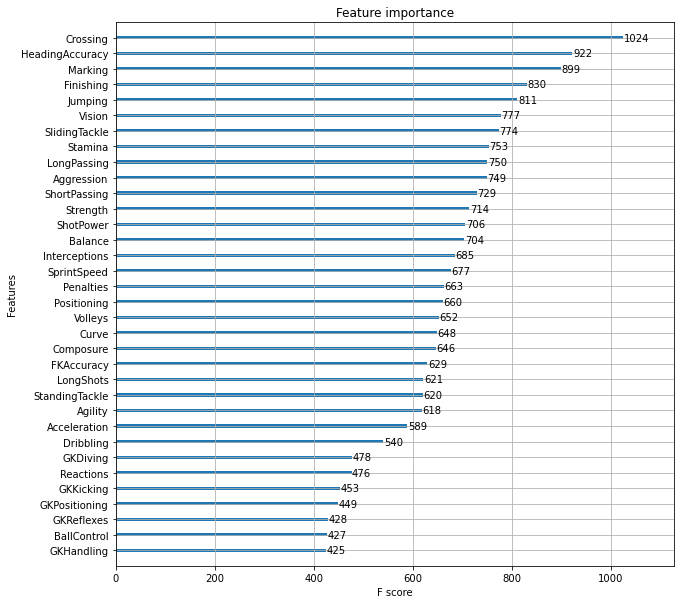

In [20]:
from xgboost import plot_importance

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plot_importance(xgb_clf1, ax=ax)

In [3]:
# lightGBM

params = {
    'n_estimators': [10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [4, 6, 8, 10],
    'num_leaves': [30, 50, 70, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_iterations': [100, 120, 150, 200]
}

lgbm_clf = LGBMClassifier()
grid_lgbm = GridSearchCV(lgbm_clf, param_grid=params, cv=3, refit=True)
grid_lgbm.fit(X_train, y_train)

print(grid_lgbm.best_params_)
print(grid_lgbm.best_score_)

In [22]:
lgbm_clf1 = LGBMClassifier(max_depth=4, min_child_weight=1,
                           learning_rate=0.1, subsample=0.6,
                          num_leaves=30, num_iterations=100, n_estimators=100)

lgbm_clf1.fit(X_train, y_train)
pred_lgbm = lgbm_clf1.predict(X_test)

print('LGBM 정확도: ', round(accuracy_score(y_test, pred_lgbm), 4))

LGBM 정확도:  0.8747


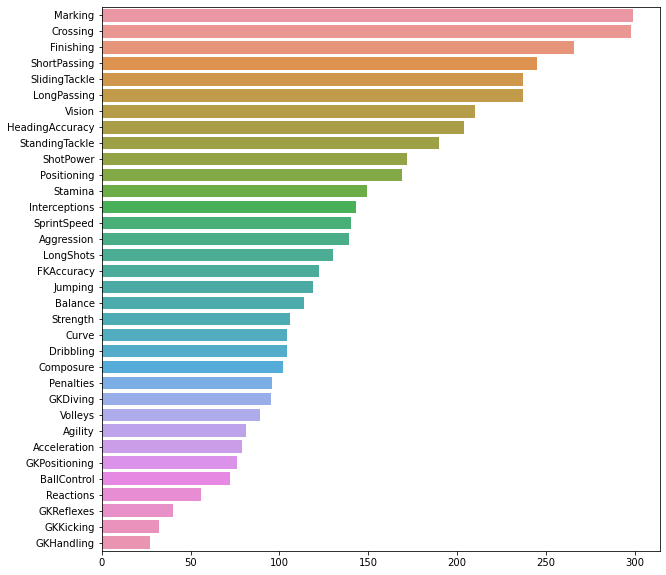

In [23]:
f_importances = lgbm_clf1.feature_importances_
f_importances = pd.Series(f_importances, index=X_train.columns)
f_top = f_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x=f_top, y=f_top.index)

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_lgbm)


In [25]:
from pycaret.classification import *

data = pd.read_csv('./FIFA2.csv')

XX = data.loc[:, 'Crossing':'GKReflexes']
yy = data.loc[:, 'Position simplified']

data_auto = pd.concat([XX, yy], axis=1)
clf = setup(data=data_auto, target='Position simplified', train_size=0.8, session_id=0)

,Description,Value
0,session_id,0
1,Target,Position simplified
2,Target Type,Multiclass
3,Label Encoded,"DF: 0, FW: 1, GK: 2, MD: 3"
4,Original Data,"(18159, 35)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
best4models = compare_models(sort='Accuracy', n_select=4, fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8849,0.9730,0.8913,0.8849,0.8844,0.8364,0.8367,9.5400
gbc,Gradient Boosting Classifier,0.8836,0.9720,0.8920,0.8834,0.8832,0.8347,0.8349,4.7333
xgboost,Extreme Gradient Boosting,0.8835,0.9716,0.8909,0.8833,0.8831,0.8346,0.8348,2.3400
lightgbm,Light Gradient Boosting Machine,0.8833,0.9723,0.8905,0.8831,0.8828,0.8343,0.8345,0.5467
rf,Random Forest Classifier,0.8792,0.9704,0.8877,0.8791,0.8786,0.8283,0.8286,0.4967
et,Extra Trees Classifier,0.8789,0.9704,0.8857,0.8792,0.8783,0.8277,0.8282,0.3500
lr,Logistic Regression,0.8785,0.9706,0.8889,0.8786,0.8783,0.8276,0.8277,2.4100
lda,Linear Discriminant Analysis,0.8681,0.9655,0.8830,0.8686,0.8682,0.8132,0.8133,0.0800
ridge,Ridge Classifier,0.8665,0.0000,0.8792,0.8670,0.8665,0.8105,0.8107,0.0733
knn,K Neighbors Classifier,0.8623,0.9517,0.8739,0.8630,0.8623,0.8044,0.8047,1.7367


### Logistic, lightgbm, RandomForest

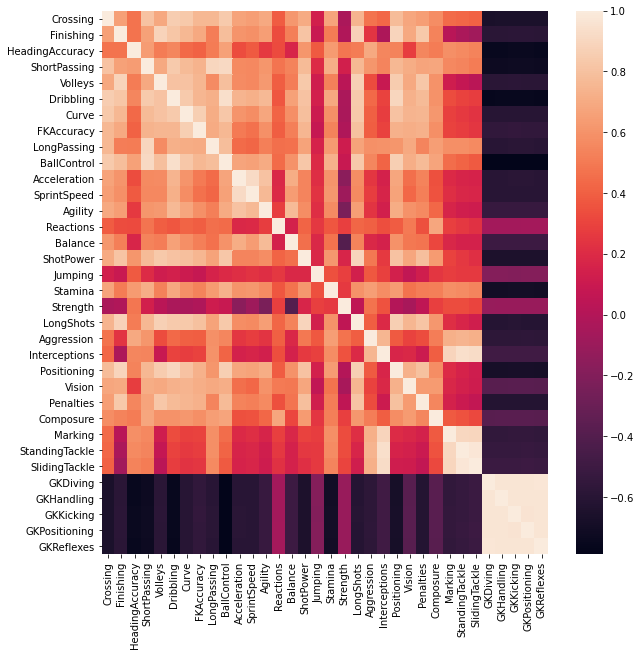

In [27]:
X_corr = X.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(X_corr)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [29]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(penalty='l2', C=5, multi_class='multinomial')
lr_clf.fit(X_train, y_train)

pred_lr = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도: ', round(accuracy_score(y_test, pred_lr), 4))

로지스틱 회귀 정확도:  0.8725


In [30]:
rf_clf1 = RandomForestClassifier(max_depth= 20, min_samples_leaf= 6, 
                                 min_samples_split= 8, n_estimators= 500)
rf_clf1.fit(X_train, y_train)
pred_rf = rf_clf1.predict(X_test)

print('랜덤포레스트 정확도: ', round(accuracy_score(y_test, pred_rf), 4))

랜덤포레스트 정확도:  0.875


In [31]:
# lgbm_clf = LGBMClassifier(max_depth=20, min_samples_leaf=8,
#                           min_samples_split=3, n_estimators=100)
lgbm_clf1 = LGBMClassifier(max_depth=4, min_child_weight=1,
                           learning_rate=0.1, subsample=0.6,
                          num_leaves=30, num_iterations=100, n_estimators=500)

lgbm_clf.fit(X_train, y_train)
pred_lgbm = lgbm_clf.predict(X_test)

print('LGBM 정확도: ', round(accuracy_score(y_test, pred_lgbm), 4))

LGBM 정확도:  0.8789


In [200]:
X = data.iloc[:, 47:81]
y = pd.factorize(data['Position simplified'])[0]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [34]:
# 피처 튜닝

X = data.iloc[:, 47:81]
y = pd.factorize(data['Position simplified'])[0]

X['gkdiving_positioning_ratio'] = X['GKDiving'] / X['Positioning']
# X['gkpositioning_positioning_ratio'] = X['GKPositioning'] / X['Positioning']
# X['gkreflexes_positioning_ratio'] = X['GKReflexes'] / X['Positioning']
# X['gkhandling_positioning_ratio'] = X['GKHandling'] / X['Positioning']
# X['gkkicking_positioning_ratio'] = X['GKKicking'] / X['Positioning']


# X['finishing_sprint_ratio'] = X['Finishing'] / X['SprintSpeed'] 
# X['finishing_acceleration_ratio'] = X['Finishing'] / X['Acceleration']

# X['interceptions_vision_diff'] = X['Interceptions'] - X['Vision']

# X['curve_finishing_ratio'] = X['Curve'] / X['Finishing']
# X['curve_finishing_diff'] = X['Curve'] - X['Finishing']
#X['fkaccuracy_marking_ratio'] = X['FKAccuracy'] / X['Marking']
#X['fkaccuracy_marking_diff'] = X['FKAccuracy'] - X['Marking']
#X['fkaccuracy_tackle_ratio'] = X['FKAccuracy'] / X['SlidingTackle']

X['fkaccuracy_tackle_diff'] = X['FKAccuracy'] - X['SlidingTackle']
X['finishing_tackle_ratio'] = X['Finishing'] / X['SlidingTackle']
X['finishing_tackle_diff'] = X['Finishing'] - X['SlidingTackle']


X.drop(['Strength','GKDiving', 'GKPositioning', 'GKReflexes', 'GKKicking', 'GKHandling'], axis=1, inplace=True)
# X.drop(['Strength','Curve','BallControl','Reactions', 'Composure','Aggression','Agility',
#         'Balance','Jumping','Acceleration','SprintSpeed','ShotPower','Stamina','FKAccuracy','Penalties',
#         'GKPositioning', 'GKReflexes', 'GKKicking', 'GKHandling'], axis=1, inplace=True)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [36]:
lr_clf = LogisticRegression(penalty='l2', C=0.08, intercept_scaling=-70, max_iter=100, multi_class='multinomial')

lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_test)

print('로지스틱 회귀 정확도(피처 튜닝 후): ', round(accuracy_score(y_test, pred_lr), 4))

로지스틱 회귀 정확도(피처 튜닝 후):  0.8744


In [ ]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf= 6, 
                                 min_samples_split=8, n_estimators= 500)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print('랜덤포레스트 정확도(피처 튜닝 후): ', round(accuracy_score(y_test, pred_rf), 4))

In [ ]:
f_imp_rf = rf_clf.feature_importances_
f_imp_rf = pd.Series(f_imp_rf, index=X_train.columns)
f_imp_rf = f_imp_rf.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.title('Random Forest feature importances')
sns.barplot(x=f_imp_rf, y=f_imp_rf.index)

In [ ]:
# lgbm_clf = LGBMClassifier(max_depth=20, min_samples_leaf=8,
#                           min_samples_split=3, n_estimators=100)
lgbm_clf1 = LGBMClassifier(max_depth=4, min_child_weight=1,
                           learning_rate=0.1, subsample=0.6,
                          num_leaves=30, num_iterations=100, n_estimators=100)

lgbm_clf.fit(X_train, y_train)
pred_lgbm = lgbm_clf.predict(X_test)

print('LGBM 정확도(피처 튜닝 후): ', round(accuracy_score(y_test, pred_lgbm), 4))

In [ ]:
f_importances = lgbm_clf.feature_importances_
f_importances = pd.Series(f_importances, index=X_train.columns)
f_top = f_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x=f_top, y=f_top.index)

In [ ]:
X = data.iloc[:, 47:81]
y = pd.factorize(data['Position simplified'])[0]

cols = X.columns

for col in cols:
    fig, ax = plt.subplots(1, 1)
    sns.distplot(X[col])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from datetime import datetime

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = LGBMClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_train,y_train)

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

In [ ]:
lgbm_clf = LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.02, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=600, n_jobs=-1,
                                            nthread=1, num_leaves=31,
                                            objective='multi:softprob', random_state=0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0,
                                            subsample_for_bin=200000,
                                            subsample_freq=0)

In [59]:
lgbm_clf.fit(X_train, y_train)

pred = lgbm_clf.predict(X_test)

print(lgbm_clf.score(X_test, y_test))

[LightGBM] [Warning] Unknown parameter: subsample1
0.8763766519823789


### 배깅

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

base_model = make_pipeline(
    StandardScaler(),
    LGBMClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [38]:
from sklearn.model_selection import cross_validate

cross_val = cross_validate(
    estimator = base_model,
    X = X_test,
    y = y_test,
    cv= 5
)

print(cross_val['test_score'].mean())

0.8700417959765214


In [39]:
base_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf')
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

cross_val = cross_validate(
    estimator = base_model,
    X = X_test,
    y = y_test,
    cv= 5
)

print(cross_val['test_score'].mean())

0.8774771599956044


### 모델 별 배깅

In [238]:
X = data.iloc[:, 47:81]
y = pd.factorize(data['Position simplified'])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [239]:
lr_clf = LogisticRegression(C=0.08, intercept_scaling=-70, max_iter=69,
                                    multi_class='multinomial',
                                    random_state=0)

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print('로지스틱 회귀 정확도')
print(round(accuracy_score(y_test, lr_pred), 4))

로지스틱 회귀 정확도
0.8725


In [240]:
# LR 배깅

lr_clf = LogisticRegression(C=0.08, intercept_scaling=-70, max_iter=69,
                                    multi_class='multinomial',
                                    random_state=0)

bagging_clf = BaggingClassifier(lr_clf, n_estimators=10, max_samples=0.5, max_features=0.5)
bagging_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)

print('로지스틱 회귀 배깅 정확도')
print(round(accuracy_score(y_test, bagging_pred), 4))

로지스틱 회귀 배깅 정확도
0.8648


In [241]:
rf_clf = RandomForestClassifier(max_depth=16, min_samples_leaf=3, min_samples_split=5,
                               n_estimators=500)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print('랜덤포레스트 정확도')
print(round(accuracy_score(y_test, rf_pred), 4))

랜덤포레스트 정확도
0.8753


In [242]:
# RF 배깅

rf_clf = RandomForestClassifier(max_depth=16, min_samples_leaf=3, min_samples_split=5,
                               n_estimators=500)

bagging_clf = BaggingClassifier(rf_clf, n_estimators=10, max_samples=0.5, max_features=0.5)
bagging_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)

print('랜덤포레스트 배깅 정확도')
print(round(accuracy_score(y_test, bagging_pred), 4))

랜덤포레스트 배깅 정확도
0.8772


In [243]:
svm_clf = SVC(kernel= 'rbf', C=10.0, gamma=0.01, random_state=0)

svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

print('SVM 정확도')
print(round(accuracy_score(y_test, svm_pred), 4))

SVM 정확도
0.3778


In [244]:
# SVM 배깅

svm_clf = SVC(kernel= 'rbf', C=10.0, gamma=0.01, random_state=0)

bagging_clf = BaggingClassifier(svm_clf, n_estimators=10, max_samples=0.5, max_features=0.5)
bagging_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)

print('SVM 배깅 정확도')
print(accuracy_score(y_test, bagging_pred))

SVM 배깅 정확도
0.5041299559471366


In [245]:
xgb_clf = XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      eval_metric='mlogloss',
                                                      gamma=0.3, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.05,
                                                      max_delta_step=0,
                                                      max_depth=9,
                                                      min_child_weight=1,
                                                      missing=np.nan,
                                                      monotone_constraints='()',
                                                      n_estimators=500,
                                                      n_jobs=8,
                                                      num_parallel_tree=1,
                                                      objective='multi:softprob',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=None,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None)

xgb_clf.fit(X_train, y_train)
pred_xgb = xgb_clf.predict(X_test)

print('XGBoost 정확도')
print(accuracy_score(y_test, pred_xgb))

XGBoost 정확도
0.8774779735682819


In [246]:
# XGB 배깅

xgb_clf = XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      eval_metric='mlogloss',
                                                      gamma=0.3, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.05,
                                                      max_delta_step=0,
                                                      max_depth=9,
                                                      min_child_weight=1,
                                                      missing=np.nan,
                                                      monotone_constraints='()',
                                                      n_estimators=500,
                                                      n_jobs=8,
                                                      num_parallel_tree=1,
                                                      objective='multi:softprob',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=None,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None)


bagging_clf = BaggingClassifier(xgb_clf, n_estimators=10, max_samples=0.5, max_features=0.5)
bagging_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)

print('XGBoost 배깅 정확도')
print(accuracy_score(y_test, bagging_pred))

XGBoost 배깅 정확도
0.8777533039647577


In [247]:
gbm_clf = GradientBoostingClassifier()

gbm_clf.fit(X_train, y_train)
pred_gbm = gbm_clf.predict(X_test)

print('GBM 정확도')
print(accuracy_score(y_test, pred_gbm))

GBM 정확도
0.8788546255506607


In [248]:
# GBM 배깅

gbm_clf = GradientBoostingClassifier()

bagging_clf = BaggingClassifier(gbm_clf, n_estimators=10, max_samples=0.5, max_features=0.5)
bagging_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)

print('GBM 배깅 정확도')
print(accuracy_score(y_test, bagging_pred))

GBM 배깅 정확도
0.8769273127753304


In [249]:
lgbm_clf = LGBMClassifier(max_depth=4, min_child_weight=1,
                           learning_rate=0.1, num_leaves=30, num_iterations=100, n_estimators=100)

lgbm_clf.fit(X_train, y_train)
pred_lgbm = lgbm_clf.predict(X_test)

print('LGBM 정확도')
print(accuracy_score(y_test, pred_lgbm))

LGBM 정확도
0.8763766519823789


In [250]:
# LGBM 배깅

lgbm_clf = LGBMClassifier(max_depth=4, min_child_weight=1,
                           learning_rate=0.1, num_leaves=30, num_iterations=100, n_estimators=100)


bagging_clf = BaggingClassifier(lgbm_clf, n_estimators=10, max_samples=0.5, max_features=0.5)
bagging_clf.fit(X_train, y_train)

bagging_pred = bagging_clf.predict(X_test)

print('LGBM 배깅 정확도')
print(accuracy_score(y_test, bagging_pred))

LGBM 배깅 정확도
0.8780286343612335


### 스태킹

In [251]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ', folder_counter, ' 시작')
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n.iloc[valid_index]
        
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    
    return train_fold_pred, test_pred_mean

In [252]:
X = data.iloc[:, 47:81]
y = pd.factorize(data['Position simplified'])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [267]:
svm_clf = SVC(kernel='rbf', C=10.0, gamma=0.01, random_state=0)
xgb_clf = XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      eval_metric='mlogloss',
                                                      gamma=0.3, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.05,
                                                      max_delta_step=0,
                                                      max_depth=9,
                                                      min_child_weight=1,
                                                      missing=np.nan,
                                                      monotone_constraints='()',
                                                      n_estimators=500,
                                                      n_jobs=8,
                                                      num_parallel_tree=1,
                                                      objective='multi:softprob',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=None,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None)
gbm_clf = GradientBoostingClassifier()
lgbm_clf = lgbm_clf = LGBMClassifier(max_depth=4, min_child_weight=1,
                           learning_rate=0.1, num_leaves=30, num_iterations=100, n_estimators=100)
rf_clf = rf_clf = RandomForestClassifier(max_depth=16, min_samples_leaf=3, min_samples_split=5,
                               n_estimators=500)


lr_final = LogisticRegression()


In [263]:
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 5)
svm_train, svm_test = get_stacking_base_datasets(svm_clf, X_train, y_train, X_test, 5)
gbm_train, gbm_test = get_stacking_base_datasets(gbm_clf, X_train, y_train, X_test, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_clf, X_train, y_train, X_test, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_clf, X_train, y_train, X_test, 5)

RandomForestClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
SVC  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
GradientBoostingClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
XGBClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
LGBMClassifier  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작


In [269]:
stack_final_X_train = np.concatenate((rf_train, svm_train, gbm_train, xgb_train, lgbm_train), axis=1)
stack_final_X_test = np.concatenate((rf_test, svm_test, gbm_test, xgb_test, lgbm_test), axis=1)

print(stack_final_X_train.shape)

(14527, 5)


In [1]:
lr_final.fit(stack_final_X_train, y_train)
pred_final = lr_final.predict(stack_final_X_test)

print((accuracy_score(y_test, pred_final)))

In [266]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [198]:
svm_clf = SVC()
rf_clf = RandomForestClassifier()
gbm_clf = GradientBoostingClassifier()

lr_final = LogisticRegression()

In [2]:
svm_train, svm_test = get_stacking_base_datasets(svm_clf, X_train, y_train, X_test, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 5)
gbm_train, gbm_test = get_stacking_base_datasets(gbm_clf, X_train, y_train, X_test, 5)

In [166]:
stack_final_X_train = np.concatenate((rf_train, rf_train, gbm_train), axis=1)
stack_final_X_test = np.concatenate((svm_test, rf_test, gbm_test), axis=1)

In [183]:
lr_final.fit(stack_final_X_train, y_train)
pred_final = lr_final.predict(stack_final_X_test)

print(accuracy_score(y_test, pred_final))

0.9736842105263158


In [168]:
gbm_pred = gbm_clf.predict(X_test)

print(round(accuracy_score(y_test, gbm_pred, 4)))

1.0


In [178]:
lgbm_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

print(accuracy_score(y_test, pred))

0.9385964912280702
